In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
!pip install geopandas
!pip install descartes 

     |████████████████████████████████| 994 kB 4.1 MB/s 
     |████████████████████████████████| 6.6 MB 16.4 MB/s 
     |████████████████████████████████| 15.4 MB 43 kB/s 


In [6]:
import geopandas as gpd


In [8]:
!pip install pyshp

     |████████████████████████████████| 219 kB 4.1 MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37324 sha256=aca114b7305de2dce26032a03d0c70046db2e0928155dda8012c8a03793e2f74
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built pyshp


In [9]:
import shapefile as shp

In [10]:
sf = shp.Reader("uzb_admbnda_adm1_2018b.shp")

In [12]:
len(sf.shapes())

14

In [13]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [14]:
df = read_shapefile(sf)
df.shape

(14, 13)

In [15]:
df.head()

,ADM0_EN,ADM0_RU,ADM0_UZ,ADM0ALT1EN,ADM0_PCODE,ADM1_EN,ADM1_RU,ADM1_UZ,ADM1TYPE_E,ADM1TYPE_R,ADM1TYPE_U,ADM1_PCODE,coords
0,Uzbekistan,Республика Узбекистан,O'zbekiston Respublikasi,Republic of Uzbekistan,UZ,Andizhan,Андижанская,Andijon,province,область,viloyati,UZ03,"[(72.35866494475906, 41.064262062192235), (72...."
1,Uzbekistan,Республика Узбекистан,O'zbekiston Respublikasi,Republic of Uzbekistan,UZ,Bukhara,Бухарская,Buxoro,province,область,viloyati,UZ06,"[(63.67380106167065, 40.67515506182987), (63.6..."
2,Uzbekistan,Республика Узбекистан,O'zbekiston Respublikasi,Republic of Uzbekistan,UZ,Dzhizak,Джизакская,Jizzax,province,область,viloyati,UZ08,"[(67.32945994007521, 41.202655062321135), (67...."
3,Uzbekistan,Республика Узбекистан,O'zbekiston Respublikasi,Republic of Uzbekistan,UZ,Fergana,Ферганская,Farg'ona,province,область,viloyati,UZ30,"[(71.83503694427134, 39.985980061188044), (71...."
4,Uzbekistan,Республика Узбекистан,O'zbekiston Respublikasi,Republic of Uzbekistan,UZ,Kashkadarya,Кашкадарьинская,Qashqadaryo,province,область,viloyati,UZ10,"[(65.7539439386079, 39.510505060745196), (65.7..."


In [16]:
def calc_color(data, color=None):
        if color   == 1: color_sq = ['#dadaebFF','#bcbddcF0','#9e9ac8F0',
                        '#807dbaF0','#6a51a3F0','#54278fF0']; colors = 'Purples';
        elif color == 2: color_sq = ['#c7e9b4','#7fcdbb','#41b6c4',
                        '#1d91c0','#225ea8','#253494']; colors = 'YlGnBu';
        elif color == 3: color_sq = ['#f7f7f7','#d9d9d9','#bdbdbd',
                        '#969696','#636363','#252525']; colors = 'Greys';
        elif color == 9: color_sq = ['#ff0000','#ff0000','#ff0000',
                        '#ff0000','#ff0000','#ff0000']
        else:            color_sq = ['#ffffd4','#fee391','#fec44f',
                        '#fe9929','#d95f0e','#993404']; colors = 'YlOrBr';
        new_data, bins = pd.qcut(data, 6, retbins=True, 
        labels=list(range(6)))
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val]) 
        if color != 9:
            colors = sns.color_palette(colors, n_colors=6)
            sns.palplot(colors, 0.6);
            for i in range(6):
                print ("\n"+str(i+1)+': '+str(int(bins[i]))+
                       " => "+str(int(bins[i+1])-1), end =" ")
            print("\n\n   1   2   3   4   5   6")    
        return color_ton, bins;

In [17]:
def plot_comunas_data(sf, title, comunas, data=None, 
                      color=None, print_id=False):
    '''
    Plot map with selected comunes, using specific color
    '''
    
    color_ton, bins = calc_color(data, color)
    df = read_shapefile(sf)
    comuna_id = []
    for i in comunas:
        comuna_id.append(df[df.ADM1_EN == i].index.values[0])
    plot_map_fill_multiples_ids_tone(sf, title, comuna_id, 
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9));

In [18]:
def plot_map_fill_multiples_ids_tone(sf, title, comuna,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
        
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in comuna:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[comuna.index(id)])
        if print_id != False:
            x0 = np.mean(x_lon)
            y0 = np.mean(y_lat)
            plt.text(x0, y0, id, fontsize=10)
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)


1: 525947 => 878780 
2: 878781 => 1226974 
3: 1226975 => 1627430 
4: 1627431 => 1838599 
5: 1838600 => 2001427 
6: 2001428 => 2394632 

   1   2   3   4   5   6


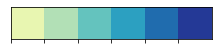

<Figure size 792x648 with 0 Axes>

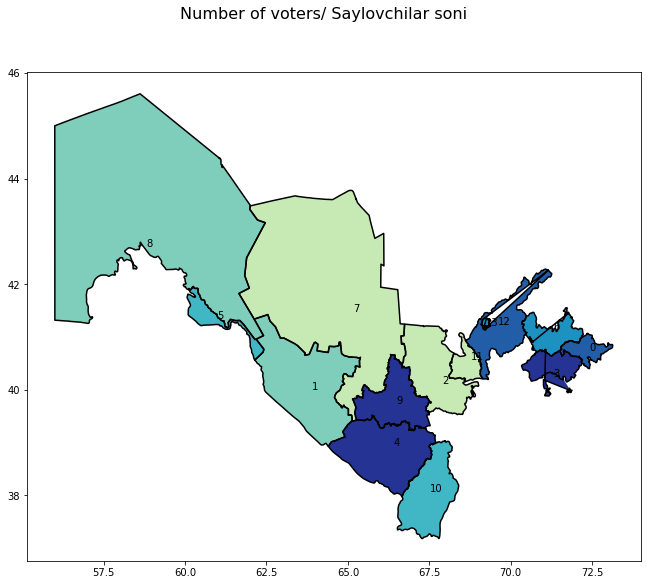

In [33]:
south = ['Andizhan', 'Bukhara', 'Dzhizak', 'Fergana', 'Kashkadarya', 'Khorezm', 'Namangan', 'Navoi', 'Republic of Karakalpakstan', 'Samarkand', 'Surkhandarya', 'Syrdarya', 'Tashkent', 'Tashkent city']
data = [1966648, 1225991, 822745, 2394633, 2008384, 1228943, 1761586, 663785, 1158966, 2376413, 1592259, 525947, 1877107, 1662604]
print_id = True # The shape id will be printed
color_pallete = 2 # 'Purples'
plot_comunas_data(sf, 'Number of voters/ Saylovchilar soni', south, data, color_pallete, print_id)